
## Analytics Specializations & Applications - Week 3

# Customer Segmentation - Example Case Study
----------

In this task we are going to do some customer analytics that harks back to the sort of segmentation that was first made possible through the introduction of Tesco Clubcard by Dunnhumby in 1994 (an introduction that caused Tesco's then-Chairman Lord MacLaurin, who said "What scares me about this is that you know more about my customers after three months than I know after 30 years.") and now are being used by almost every retail compnay, including of course Boots!

Boots' data contains hundreds of thousands of different products - to be usable as an input to customer segmentation (and to avoid the curse of dimensionality) the first stage of any analysis is normally to compress this space down to a manageable size. This can be done by factorization techniques (such as PCA, which we will use today), or by considering purchases in terms of product categories (at various levels of the hierarchy - the broadest being by department). 

However, in todays example we will use some data that's already categorized by department so we don't have to worry about the curse of dimensionality. Our wholesaler scenario is as follows:


## Scenario:
This week we consider a market segmentation task that will allow us to hone our clustering skills, along with requiring us to consider how we interpret the results of our analysis. The setting is a grocery wholesale retailer whose customers are themselves public facing outlets. We want to see if we can find some useful segments in those customers. Let's run through the process step by step, remembering that you could do the same steps on any customer data you liked...


### Task 3a: Preparing the data
As ever, the first step is loading in and prepping the data. This, as you have no doubt noticed, is an unavoidable step in all analytics! Let's get it out of the way.

<span style="font-weight:bold; color:green;">&rarr; Load in the customer_transactions.csv dataset and put the input features and output features (the last field in the file) into their own variables, X and Y respectively:<span/>

Refer to previous examples from FBA if needed... but better still look up the pandas read_csv documentation on google.

In [1]:
import pandas

#-- load in the data
filename = "wholesale_customer_data.csv"
data = pandas.read_csv(filename)

#-- first remove the columns 'Region' and 'Channel'
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

#-- detail the number of datapoints and featuers
print("Number of datapoints:", data.shape[0])
print("Number of features:", data.shape[1])

#-- print out some summary statistics as per normal
data.describe()

Number of datapoints: 440
Number of features: 6


,FRUIT_VEG,DAIRY,FROZEN,DELI,OTHER_GROCERY,HOUSEHOLD
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,3071.931818,1524.870455,7951.277273,2881.493182
std,12647.328865,7380.377175,4854.673333,2820.105937,9503.162829,4767.854448
min,3.000000,55.000000,25.000000,3.000000,3.000000,3.000000
25%,3127.750000,1533.000000,742.250000,408.250000,2153.000000,256.750000
50%,8504.000000,3627.000000,1526.000000,965.500000,4755.500000,816.500000
75%,16933.750000,7190.250000,3554.250000,1820.250000,10655.750000,3922.000000
max,112151.000000,73498.000000,60869.000000,47943.000000,92780.000000,40827.000000


You should now be used to first rapidly exploring the data through visualizations and code to understand how each feature is related to the others. We already know the categories we have to describe customers in, and can see their nature:

* FRUIT_VEG: annual spending (m.u.) on fresh fruit and vegetable products (Continuous)
* DAIRY: annual spending (m.u.) on all dairy related products (Continuous)
* FROZEN: annual spending (m.u.) on all frozen products (Continuous)
* DELI: annual spending (m.u.) on specialized delicatessen products (Continuous)
* OTHER_GROCERY: annual spending (m.u.) on all other grocery products (Continuous)
* HOUSEHOLD: annual spending (m.u.) on household (non-food) products (Continuous)

(Just in case you don't know a delicatessen counter is one that sells "cold cuts of meat, cheeses, and a variety of salads, as well as a selection of unusual or foreign prepared foods").

We are already using broad categories, and there are only six of them -  so we don't need to do any dimension reduction. Let's get straight into it:

### Task 2b: 
We've done a lot of 'graphing' in other exercises so we won't create bar charts of purchases here. Instead, to get a better understanding of how variables relate to each other, let's create a scatter matrix of each of the six product categories present in the data in a single command. 

Try the following code:


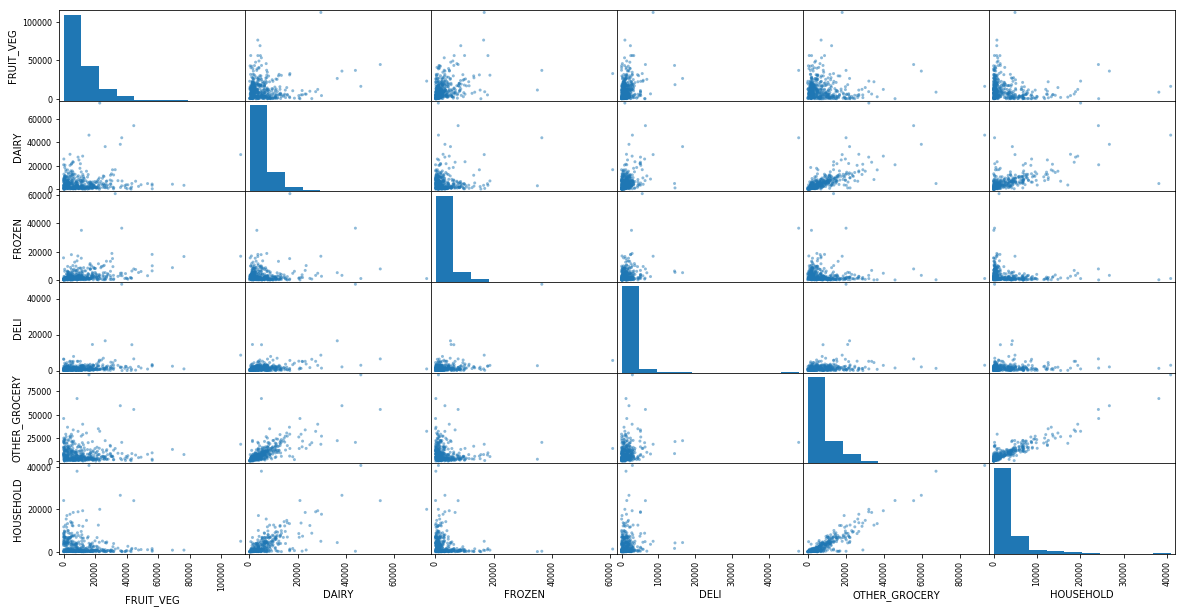

In [2]:
#-- and get a sense of them visually
%matplotlib inline
import matplotlib.pyplot as plt

#-- Produce a scatter matrix for each pair of features in the data
scatter = pandas.plotting.scatter_matrix(data, figsize = (20,10))

The scatter matrix below may  show you potential correlations (which are a problem!) by eye. 

### Task 3c: 
**QUESTION** - Which pair of product categories are most highly related to each other?
> ANSWER - OTHER_GROCERY and HOUSEHOLD seem to be exhibiting a strong linear relationship.

**QUESTION** - Is there any other product category which also seems paritally correlated with them?
> ANSWER - Dairy also seems to be correlated to some extent with those categories.

### Task 3d:
Let's check it using the corr() function that pandas provides to examine the Pearson correlations each product category has with each other: 

In [3]:
#-- create and print a cross correlation of all the variables against each other
corr = data.corr()
print(corr)


               FRUIT_VEG     DAIRY    FROZEN      DELI  OTHER_GROCERY  \
FRUIT_VEG       1.000000  0.100510  0.345881  0.244690      -0.011854   
DAIRY           0.100510  1.000000  0.123994  0.406368       0.728335   
FROZEN          0.345881  0.123994  1.000000  0.390947      -0.040193   
DELI            0.244690  0.406368  0.390947  1.000000       0.205497   
OTHER_GROCERY  -0.011854  0.728335 -0.040193  0.205497       1.000000   
HOUSEHOLD      -0.101953  0.661816 -0.131525  0.069291       0.924641   

               HOUSEHOLD  
FRUIT_VEG      -0.101953  
DAIRY           0.661816  
FROZEN         -0.131525  
DELI            0.069291  
OTHER_GROCERY   0.924641  
HOUSEHOLD       1.000000  


Do the results correspond to what your saw in the scatterplots? 

### Task 3e: Tidying up the different feature categories
This is actually fine for when we have 6 variables, but when we have more a visual heatmap is a useful shortcut to spotting categories which share the same information. Let's just run through some code you can use in the future to create one
 
<span style="font-weight:bold; color:green;">&rarr; Run the following code, and check your results. Alter the colour map to something more attractive from https://matplotlib.org/examples/color/colormaps_reference.html <span/>


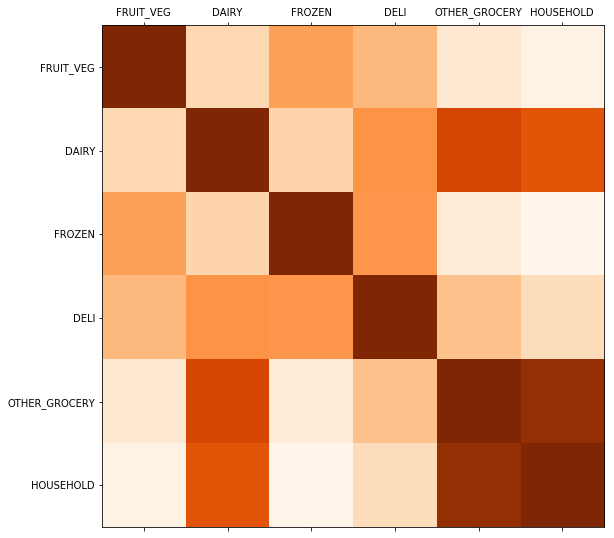

In [4]:
#-- Plot the results using a heatmap
plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.matshow(corr, cmap="Oranges")

#-- set the names of each column on the graph
plt.xticks(range(6), data.columns);
plt.yticks(range(6), data.columns);

The fact that OTHER_GROCERY features is strongly correlated does lend credence to the proposal that it may not be necessary at all for summarizing customers' spending habits - the information the category holds is already in HOUSEHOLD and DAIRY. We might want to do something about this, otherwise a customer segmentation might double count that information... and hence be skewed to separating customers on that dimension.


### Task 3g: Applying the log transform to make the data more "normal"

The other problem you may have noticed from the scatter plots is that very few product categories are "normally distributed" (Go back and check the diagonal of your scatterplot - you'll notice that there is a huge general skew to the left. It's actually worth us fixing this because (as you may recall) many clustering techniques seek to find "globular" clusters (especially k-means) - so people often pre-process the data so it looks more "normal".


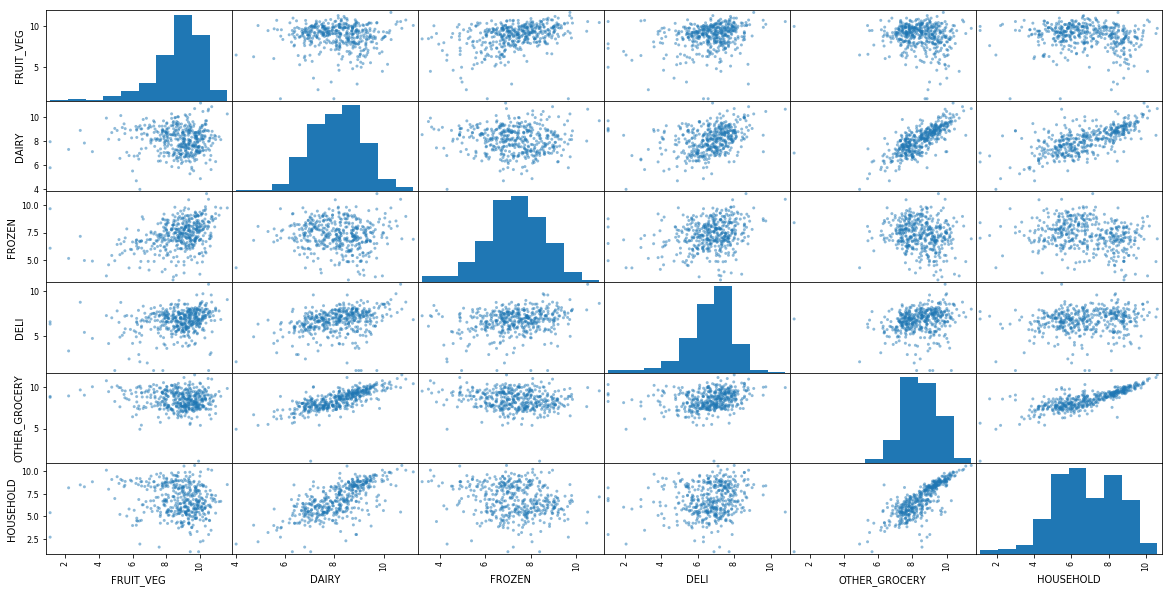

In [5]:
import numpy as np

# Scale the data using the natural logarithm
logged_data = np.log(data)

#-- Produce a scatter matrix using the logged data...
scatter = pandas.plotting.scatter_matrix(logged_data, figsize = (20,10))

You'll hopefully have seen above that after applying a logarithm scaling to the data, the distribution of each feature should appears much more normal (Take care here though - applying this transformation can change how much categories appear to correlate to each other). We'll continue using this data henceforth!


### Task 3h: Feature Engineering
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the  customer data. Now you might think that strictly we don't need to do this - why would we try and reduce dimensions when we only have 6 categories? It's obvious we'd need to do this if we were using raw product purchases (as we would have essentially thousands of categories)... but why here?

The reason is we want to **eliminate the correlations** in our data if at all possible as they will skew results towards partitioning customers based on those correlated variables. To do this we could use a variety of techniques, but lets use PCA here (review last semester's lecture slides on PCA if you can't remember what it does).

In addition to helping eliminate correlated dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original categories present in the data, so will take some interpreting.

<span style="font-weight:bold; color:green;">&rarr; Run the following code, and analyse your results.<span/>


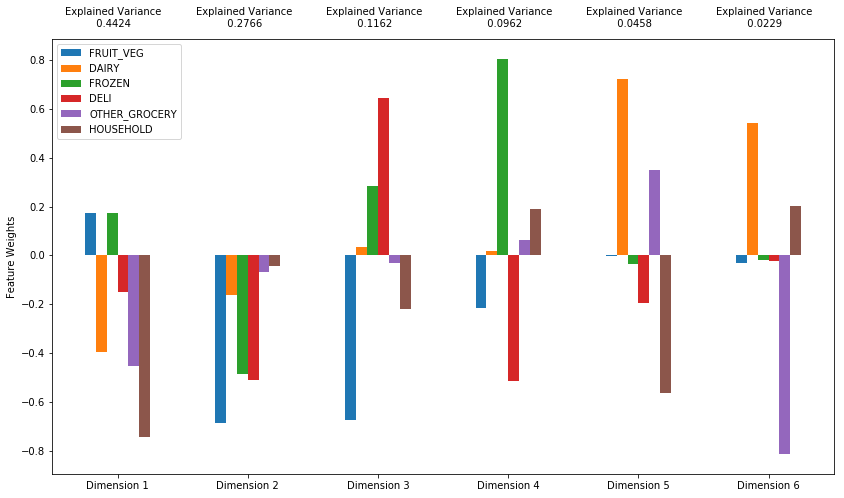

In [6]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(logged_data)

#-- import a helpful set of functions to ease displaying results..
import renders as rs

#-- Generate a PCA results plot 
pca_results = rs.pca_results(logged_data, pca)



<span style="font-weight:bold; color:green;">&rarr;How much variance in the data is explained in total by the first and second principal component? What about the first four principal components? <span/>


Hint: A positive increase in a specific dimension corresponds with an increase of the positive-weighted features and a decrease of the negative-weighted features. The rate of increase or decrease is based on the indivdual feature weights.

> Answer:
* 70.68% of the variance in the data is explained by the first and second principal components.
* 93.11% of the variance in the data is explained by the first four principal components.


### Task 3i: Interpreting potential Features

A key task in the real world when analysing the results of factorization, is to get a handle on what each new Dimension means to the real world. Your task is as follows:

<span style="font-weight:bold; color:green;">&rarr; 
Using the graph you've created above create a short description of what you think each of the first three dimensions resulting from PCA **mean**, and give each one a descriptive name of your choice to add further analysis.<span/>

> Answer:

>**The first principal component (PC1):**
> Here a decrease in PC1 is associated with large increases in "Dairy", "Grocery" and "Household Cleaning items" spending.
Even though they have neagtive values these features best represent PC1 and are completely in line with our initial findings where the 3 features are highly correlated. However note that the most significant item are Household Cleaning items, indicating that this feature really distinguishes client's who don't use this item from those that do. I might call this:
> **"BASIC_FOOD_AND_CLEANING"** (even though this is the reverse polarity, and i'm looking for high negative values! PCA can be confusing)

>**The second principal component (PC2):**
> In this case a decrease in PC2 is associated with large increases in "Fruit and Veg", "Frozen" and "Delicatessen" spending.
These features best represent PC2. This makes sense as PC1 represents different features. And in PC2, the features in PC1 have very small positive weights. So here I might refer to the dimensions as:
> **"NON_STANDARD_GROCERIES"**

>**The third principal component (PC3)**
> An increase in PC3 is associated with a large increase in "Delicatessen" and a large decrease in "Fruit and veg" spending.
These features best represent PC3, and really indicate an outlet that is more rapid, potentially more boutique, where service changes daily. So here I might refer to the dimension as (again in reverse):
> **"FRESHER_FOODS"**

Note that minus sign is not important. PCA dimensions can be flipped on their head to help interpretation (this will just mean each customer's coefficients in the compressed space get reversed - which is no problem, and something we will rarely observe)


### Task 3j: Selecting our final Features

When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, we implement the following:

* We rerun PCA on our logged_data, so we only use the first two dimensions
* We apply a PCA transformation of good_data using pca.transform, and assign the reuslts to reduced_data.


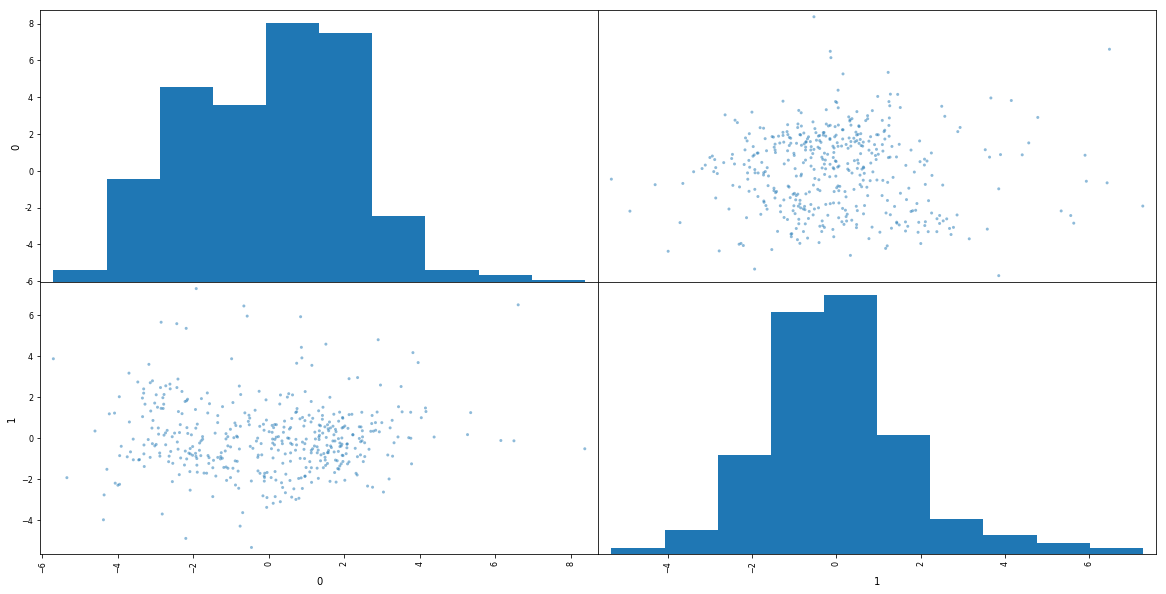

In [7]:
# TODO: Apply PCA by fitting the good data with only two dimensions
# Instantiate
pca = PCA(n_components=2)
pca.fit(logged_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(logged_data)

# Create a DataFrame for the reduced data
reduced_data = pandas.DataFrame(reduced_data)
scatter = pandas.plotting.scatter_matrix(reduced_data, figsize = (20,10))



### Task 3k: Clustering

In this section, we can finally create our segments. Let's use the K-Means clustering algorithm to identify the various customer segments hidden in the data. We will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. But how many segments do we want?

Depending on the business problem, the number of clusters that we expect to be in the data may already be known. However, when the number of clusters is not known a priori, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:

* Fit a clustering algorithm to the reduced_data and assign it to clusterer.
* Predict the cluster for each data point in reduced_data using clusterer.predict and assign them to preds.
* Find the cluster centers using the algorithm's respective attribute and assign them to centers.
* Predict the cluster for each sample data point in pca_samples and assign them sample_preds.
* Import sklearn.metrics.silhouette_score and calculate the silhouette score of reduced_data against preds.
* Assign the silhouette score to score and print the result.


<span style="font-weight:bold; color:green;">&rarr; Task: complete the following code (using online documentation if necessary) to create a 3 segment solution. <span/>



In [8]:
#-- New  imports we will need
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#-- Create a clusterer that fits to 3 segments
k = 3
clusterer = KMeans(n_clusters=k)
clusterer.fit(reduced_data)

#-- TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
    
#-- Calculate a silhouette score for the 3 segment solution
score = silhouette_score(reduced_data, preds, metric='euclidean')
print("For n_clusters = {}. The average silhouette_score is : {})".format(k, score))


For n_clusters = 3. The average silhouette_score is : 0.39347319148245263)


### Task 3m: Finding the right number of segments
This is fine, but let's search through a range of k from 2 through to 10 clusters to find out which has the best silhouette score.

<span style="font-weight:bold; color:green;">&rarr;  Task: complete the following code (using online documentation if necessary) to create a 3 segment solution. Create a loop that uses the above code to find silhouette scores for different values of k, from 2 though to 10 segments<span/>


In [18]:
# Create range of clusters 
range_n_clusters = list(range(2,11))
print(range_n_clusters)
range_score = []
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    range_score.append(score)
    print("For n_clusters = {}. The average silhouette_score is : {})".format(n_clusters, score))
    
    

[2, 3, 4, 5, 6, 7, 8, 9, 10]
For n_clusters = 2. The average silhouette_score is : 0.4191660832029231)
For n_clusters = 3. The average silhouette_score is : 0.39597528613124716)
For n_clusters = 4. The average silhouette_score is : 0.3302295635320473)
For n_clusters = 5. The average silhouette_score is : 0.3508288764895782)
For n_clusters = 6. The average silhouette_score is : 0.34419200512519177)
For n_clusters = 7. The average silhouette_score is : 0.35021200717405976)
For n_clusters = 8. The average silhouette_score is : 0.34820742818063355)
For n_clusters = 9. The average silhouette_score is : 0.35233586157516766)
For n_clusters = 10. The average silhouette_score is : 0.3457096633179616)


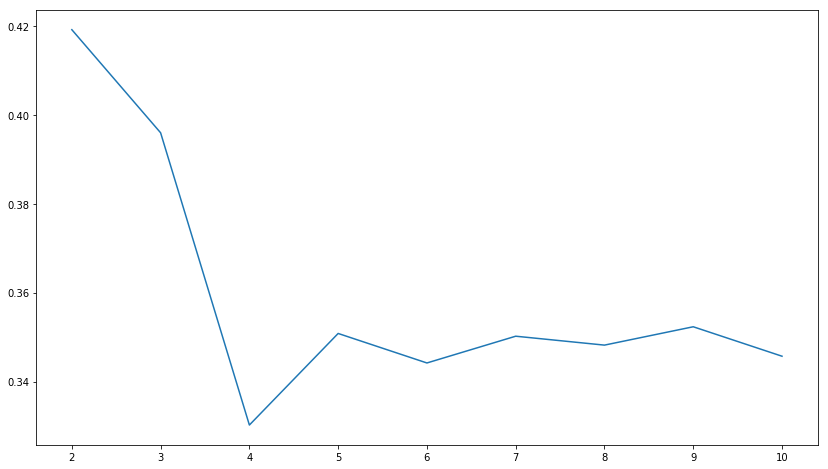

In [22]:
plt.plot(range_n_clusters, range_score)
plt.show()

The Silhouette Coefficient is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample. Therefore, it makes sense to use the same distance metric here as the one used in the clustering algorithm. Which is the highest score?

Let's pick that in lieu of any other knowledge of the business domain as our ideal number for purposes of this case study example.


### Task 3m: Cluster Visualisation
Once you've chosen the optimal number of segments for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters.

<span style="font-weight:bold; color:green;">&rarr; Run the following visualization code, but add axis titles to the graph:</span>

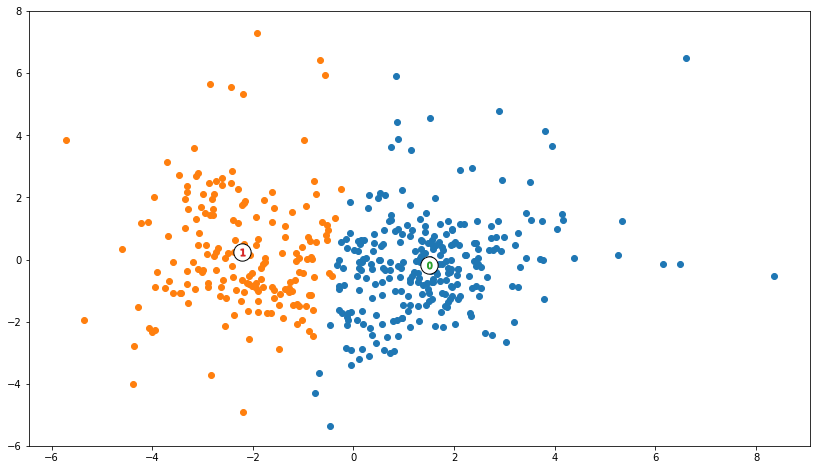

In [44]:
#-- Our final clustering solution
clusterer = KMeans(n_clusters=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centres = clusterer.cluster_centers_

#-- Put the predictions into a pandas dataframe format
assignments = pandas.DataFrame(preds, columns = ['Cluster'])

#-- Put the predictions into a pandas dataframe format
plot_data = pandas.concat([assignments, reduced_data], axis = 1)

#-- Color the points based on assigned cluster (n.b scatter will do this for us automatically)
plt.rcParams['figure.figsize'] = (14.0, 8.0)

for i, c in plot_data.groupby('Cluster'):  
    plt.scatter(c[0], c[1])
    
#-- Plot where the cluster centers are
for i, c in enumerate(centres):
    plt.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', marker = 'o', s=300);
    plt.scatter(x = c[0], y = c[1], marker='${}$'.format(i), alpha = 1, s=50);

Have a play around with this code, and examine what happens when we change k, before returning it to 2 segments.

Great. We have our segments. But what do they mean?

### Task 3n: Recovering Segment Archetypes in the original variables
Each cluster present in the visualization above has a central point. These centres (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's centre point corresponds to the average customer of that segment. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:

* Apply the inverse transform to centers using pca.inverse_transform and assign the new centers to log_centers.
* Apply the inverse function of np.log to log_centers using np.exp() and assign the true centers to true_centers.

<span style="font-weight:bold; color:green;">&rarr; Create the following code block to display our archetype profiles for each segment:</span>

In [11]:
# TODO: Inverse transform the centres
log_centres = pca.inverse_transform(centres)

# TODO: Exponentiate the centres
true_centres = np.exp(log_centres)

#-- Display the true centres
segments = ['Segment {}'.format(i) for i in range(0, len(centres))]
true_centres = pandas.DataFrame(np.round(true_centres), columns = data.columns)
true_centres.index = segments
print(true_centres)

           FRUIT_VEG   DAIRY  FROZEN   DELI  OTHER_GROCERY  HOUSEHOLD
Segment 0     8994.0  1909.0  2081.0  681.0         2366.0      290.0
Segment 1     3570.0  7749.0   900.0  966.0        12463.0     4567.0


### Task 3o: Creating Profiles
One final step is required, and we are going to do this in groups - if we join our "predictions" dataframe which is telling us which people are in which cluster, with the original data, we can use summary statistics to analyse the data and create "profile" descriptions of what we think these entities are. Note that the means from these segments in the original space will be **different** (but related) to the centres in the clustering space, due to all the transformations we undertook.

Use **groupby()** and **describe()** to paint a picture of each cluster in the original space, compare that to your centroid results above. From these come up with a short description of each segment that could be used by the business, before we compare them to the reality.

> Hint: This is wholesale data providing different types of business outlets with the items they need to function.


In [12]:
#-- Join the segment assignments to the original data 
final_assigments = pandas.concat([assignments, data], axis = 1)

#-- Create a loop that describes summary statistics for each segment
for c, d in final_assigments.groupby('Cluster'):  
    print("SEGMENT", c)
    display(d.describe())

SEGMENT 0


,Cluster,FRUIT_VEG,DAIRY,FROZEN,DELI,OTHER_GROCERY,HOUSEHOLD
count,262.0,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,0.0,14306.583969,2959.145038,4085.167939,1356.374046,3282.427481,471.396947
std,0.0,12936.369897,3868.752082,5878.266968,3199.243980,2871.018926,510.597459
min,0.0,3.000000,55.000000,47.000000,3.000000,3.000000,3.000000
25%,0.0,5059.000000,1054.500000,909.250000,383.000000,1642.750000,168.250000
50%,0.0,10724.500000,1916.500000,2282.500000,804.000000,2466.500000,322.000000
75%,0.0,19186.000000,3618.250000,5318.000000,1449.750000,4029.750000,625.500000
max,0.0,76237.000000,43950.000000,60869.000000,47943.000000,20170.000000,4762.000000


SEGMENT 1


,Cluster,FRUIT_VEG,DAIRY,FROZEN,DELI,OTHER_GROCERY,HOUSEHOLD
count,178.0,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.0,8605.651685,9972.252809,1580.539326,1772.882022,14823.404494,6428.938202
std,0.0,11423.333014,9141.957121,1935.089668,2128.102816,11492.421673,5894.377892
min,1.0,3.000000,1115.000000,25.000000,3.000000,2824.000000,223.000000
25%,1.0,2026.000000,5272.250000,419.000000,534.500000,8028.750000,2998.500000
50%,1.0,5339.500000,7529.500000,1028.500000,1311.500000,11443.000000,4606.500000
75%,1.0,11798.750000,11101.000000,1904.750000,2156.000000,18667.750000,7407.000000
max,1.0,112151.000000,73498.000000,16745.000000,16523.000000,92780.000000,40827.000000
